Found 840 images belonging to 3 classes.
Found 210 images belonging to 3 classes.
Found 117 images belonging to 3 classes.
Epoch 1/10


C:\Users\kaush\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 0.2957 - loss: 1.1799
Epoch 1: val_accuracy improved from -inf to 0.33333, saving model to C:\Users\kaush\Downloads\face\best_face_shape_efficientnet_model.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 28s 509ms/step - accuracy: 0.2961 - loss: 1.1792 - val_accuracy: 0.3333 - val_loss: 1.0988
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.3024 - loss: 1.1166
Epoch 2: val_accuracy did not improve from 0.33333
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 369ms/step - accuracy: 0.3025 - loss: 1.1165 - val_accuracy: 0.3333 - val_loss: 1.0988
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.3172 - loss: 1.1012
Epoch 3: val_accuracy did not improve from 0.33333
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 392ms/step - accuracy: 0.3166 - loss: 1.1013 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.3344 - loss: 1.0993
Epoch 4: val_accuracy did not improve from 0.33333
27/27 ━━━━━━━━━━━━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 324ms/step - accuracy: 0.7393 - loss: 1.0977
Test Loss: 1.098156213760376
Test Accuracy: 0.6581196784973145
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step  
Classification Report:
                     precision    recall  f1-score   support

Rounded_Double_Chin       0.00      0.00      0.00         9
Tapering_Triangular       0.66      1.00      0.79        77
       Thin_Angular       0.00      0.00      0.00        31

           accuracy                           0.66       117
          macro avg       0.22      0.33      0.26       117
       weighted avg       0.43      0.66      0.52       117

Confusion Matrix:
[[ 0  9  0]
 [ 0 77  0]
 [ 0 31  0]]


C:\Users\kaush\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kaush\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kaush\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

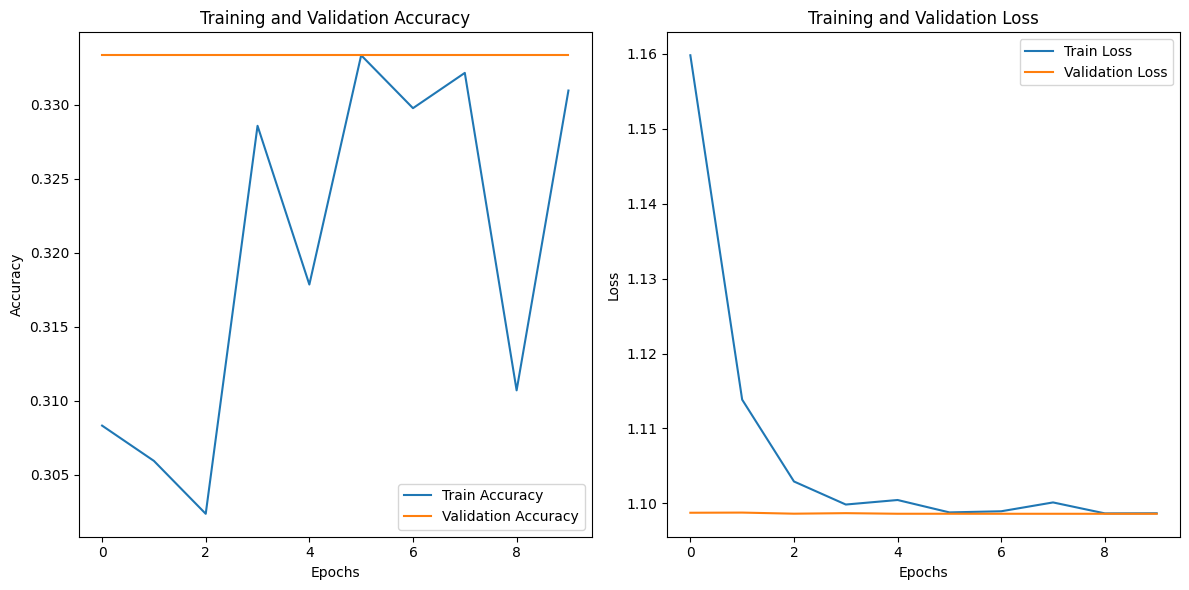

Model training, evaluation, and history saving complete.


In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import ModelCheckpoint, History
import matplotlib.pyplot as plt
import pickle

# Directories for the augmented dataset classes
augmented_dataset_dir = r'C:\Users\kaush\Downloads\face\augmented_dataset'
rounded_double_chin_dir = os.path.join(augmented_dataset_dir, 'Rounded_Double_Chin')
tapering_triangular_dir = os.path.join(augmented_dataset_dir, 'Tapering_Triangular')
thin_angular_dir = os.path.join(augmented_dataset_dir, 'Thin_Angular')

# Parameters
img_size = (128, 128)
batch_size = 32

# Data generators for augmented dataset (training and validation split)
datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    augmented_dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    augmented_dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Data generator for testing with unaugmented dataset
unaugmented_test_dir = r'C:\Users\kaush\Downloads\face\dataset'
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
    unaugmented_test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Model creation using EfficientNetB0
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(3, activation='softmax')(x)  # 3 output classes

model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define the checkpoint to save the best EfficientNet model with .keras extension
checkpoint_path = r'C:\Users\kaush\Downloads\face\best_face_shape_efficientnet_model.keras'
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_accuracy',  # Monitor validation accuracy
    save_best_only=True,     # Save only the best model
    mode='max',
    verbose=1
)

# Define History to save model training history
history = History()

# Train the model with the checkpoint and history callback
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[model_checkpoint, history]
)

# Save the final model with .h5 extension after training
model.save(r'C:\Users\kaush\Downloads\face\face_shape_efficientnet_model_final.h5')

# Evaluate the model on the unaugmented test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Generate classification report and confusion matrix
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred_classes))

# Save the training history to a file
history_path = r'C:\Users\kaush\Downloads\face\training_history_efficientnet.pkl'
with open(history_path, 'wb') as f:
    pickle.dump(history.history, f)

# Plot training & validation accuracy
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

print("Model training, evaluation, and history saving complete.")


In [1]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate overall precision, recall, and f1-score
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

# Print the results
print(f"Overall Precision = {precision * 100:.2f}")
print(f"Overall Recall = {recall * 100:.2f}")
print(f"Overall F1-score = {f1 * 100:.2f}")


NameError: name 'y_true' is not defined